In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine, load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [4]:
data = load_wine()
X = data.data
y = data.target
feature_names = data.feature_names

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")


Explained Variance Ratio: [0.36198848 0.1920749 ]


In [14]:
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_scaled)

print(f"Explained Variance Ratio: {pca3.explained_variance_ratio_}")

Explained Variance Ratio: [0.36198848 0.1920749  0.11123631]


In [15]:
X_pca3.shape

(178, 3)

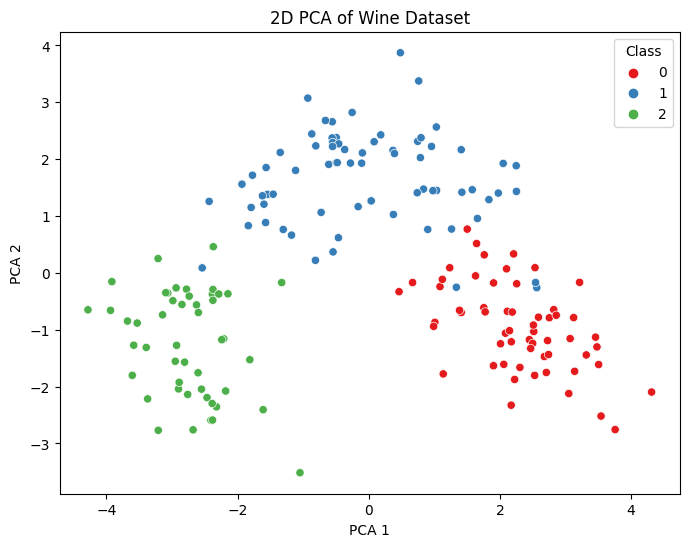

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('2D PCA of Wine Dataset')
plt.legend(title='Class')
plt.show()


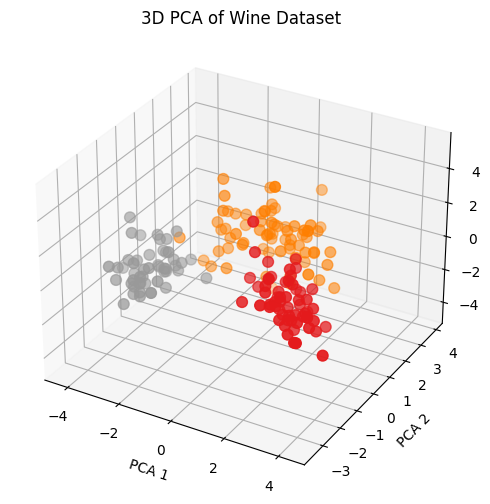

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca3[:, 0], X_pca3[:, 1], X_pca3[:, 2], c=y, cmap='Set1', s=60)
ax.set_title('3D PCA of Wine Dataset')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.show()


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_pca_train, X_pca_test = train_test_split(X_pca, test_size=0.3, random_state=42)


In [11]:
clf_orig = LogisticRegression(max_iter=1000)
clf_orig.fit(X_train, y_train)
y_pred_orig = clf_orig.predict(X_test)

print("Original Data Accuracy:", accuracy_score(y_test, y_pred_orig))


Original Data Accuracy: 0.9814814814814815


In [12]:
clf_pca = LogisticRegression(max_iter=1000)
clf_pca.fit(X_pca_train, y_train)
y_pred_pca = clf_pca.predict(X_pca_test)

print("PCA Data Accuracy:", accuracy_score(y_test, y_pred_pca))


PCA Data Accuracy: 0.9814814814814815


In [13]:
print("Original Data Classification Report:")
print(classification_report(y_test, y_pred_orig))

print("\nPCA Reduced Data Classification Report:")
print(classification_report(y_test, y_pred_pca))


Original Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54


PCA Reduced Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.95      1.00      0.98        21
           2       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

